https://www.kaggle.com/code/ryanholbrook/mutual-information

In [12]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns

plt.style.use("seaborn-whitegrid")

df = pd.read_csv("/kaggle/input/automobile-dataset/Automobile_data.csv")
df.head()

/tmp/ipykernel_33/777561230.py:6: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use("seaborn-whitegrid")


,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg,price
0,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,13495
1,3,?,alfa-romero,gas,std,two,convertible,rwd,front,88.6,...,130,mpfi,3.47,2.68,9.0,111,5000,21,27,16500
2,1,?,alfa-romero,gas,std,two,hatchback,rwd,front,94.5,...,152,mpfi,2.68,3.47,9.0,154,5000,19,26,16500
3,2,164,audi,gas,std,four,sedan,fwd,front,99.8,...,109,mpfi,3.19,3.4,10.0,102,5500,24,30,13950
4,2,164,audi,gas,std,four,sedan,4wd,front,99.4,...,136,mpfi,3.19,3.4,8.0,115,5500,18,22,17450


In [2]:
X = df.copy()
y = X.pop("price")

# Label encoding for categoricals
for colname in X.select_dtypes("object"):
    X[colname], _ = X[colname].factorize()

# All discrete features should now have integer dtypes (double-check this before using MI!)
discrete_features = X.dtypes == int

In [5]:
X.dtypes

symboling              int64
normalized-losses      int64
make                   int64
fuel-type              int64
aspiration             int64
num-of-doors           int64
body-style             int64
drive-wheels           int64
engine-location        int64
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type            int64
num-of-cylinders       int64
engine-size            int64
fuel-system            int64
bore                   int64
stroke                 int64
compression-ratio    float64
horsepower             int64
peak-rpm               int64
city-mpg               int64
highway-mpg            int64
dtype: object

In [7]:
df.dtypes

symboling              int64
normalized-losses     object
make                  object
fuel-type             object
aspiration            object
num-of-doors          object
body-style            object
drive-wheels          object
engine-location       object
wheel-base           float64
length               float64
width                float64
height               float64
curb-weight            int64
engine-type           object
num-of-cylinders      object
engine-size            int64
fuel-system           object
bore                  object
stroke                object
compression-ratio    float64
horsepower            object
peak-rpm              object
city-mpg               int64
highway-mpg            int64
price                 object
dtype: object

In [8]:
X.head()

,symboling,normalized-losses,make,fuel-type,aspiration,num-of-doors,body-style,drive-wheels,engine-location,wheel-base,...,num-of-cylinders,engine-size,fuel-system,bore,stroke,compression-ratio,horsepower,peak-rpm,city-mpg,highway-mpg
0,3,0,0,0,0,0,0,0,0,88.6,...,0,130,0,0,0,9.0,0,0,21,27
1,3,0,0,0,0,0,0,0,0,88.6,...,0,130,0,0,0,9.0,0,0,21,27
2,1,0,0,0,0,0,1,0,0,94.5,...,1,152,0,1,1,9.0,1,0,19,26
3,2,1,1,0,0,1,2,1,0,99.8,...,0,109,0,2,2,10.0,2,1,24,30
4,2,1,1,0,0,1,2,2,0,99.4,...,2,136,0,2,2,8.0,3,1,18,22


In [4]:
discrete_features.head()

symboling            True
normalized-losses    True
make                 True
fuel-type            True
aspiration           True
dtype: bool

This trick seems to work to find all occurences of a question mark, which screws up data encoding...

In [13]:
df2 = df[df.eq('?').any(axis=1)]
print (df2)

     symboling normalized-losses           make fuel-type aspiration  \
0            3                 ?    alfa-romero       gas        std   
1            3                 ?    alfa-romero       gas        std   
2            1                 ?    alfa-romero       gas        std   
5            2                 ?           audi       gas        std   
7            1                 ?           audi       gas        std   
9            0                 ?           audi       gas      turbo   
14           1                 ?            bmw       gas        std   
15           0                 ?            bmw       gas        std   
16           0                 ?            bmw       gas        std   
17           0                 ?            bmw       gas        std   
27           1               148          dodge       gas      turbo   
43           0                 ?          isuzu       gas        std   
44           1                 ?          isuzu       gas       

In [14]:
X2 = X[X.eq('?').any(axis=1)]
print (X2)

Empty DataFrame
Columns: [symboling, normalized-losses, make, fuel-type, aspiration, num-of-doors, body-style, drive-wheels, engine-location, wheel-base, length, width, height, curb-weight, engine-type, num-of-cylinders, engine-size, fuel-system, bore, stroke, compression-ratio, horsepower, peak-rpm, city-mpg, highway-mpg]
Index: []

[0 rows x 25 columns]


In [28]:
X3 = X.drop([9, 44, 45, 129])
print (X3)

     symboling  normalized-losses  make  fuel-type  aspiration  num-of-doors  \
0            3                  0     0          0           0             0   
1            3                  0     0          0           0             0   
2            1                  0     0          0           0             0   
3            2                  1     1          0           0             1   
4            2                  1     1          0           0             1   
..         ...                ...   ...        ...         ...           ...   
200         -1                 51    21          0           0             1   
201         -1                 51    21          0           1             1   
202         -1                 51    21          0           0             1   
203         -1                 51    21          1           1             1   
204         -1                 51    21          0           1             1   

     body-style  drive-wheels  engine-l

In [29]:
X = X3

In [15]:
y.head

<bound method NDFrame.head of 0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 205, dtype: object>

Huh, it looks like the prices might be screwed up, with some unknowns...

In [17]:
y2 = y[y.eq('?')]
print (y2)

9      ?
44     ?
45     ?
129    ?
Name: price, dtype: object


In [23]:
type(y2)

pandas.core.series.Series

In [24]:
y3 = y.drop([9, 44, 45, 129])
print (y3)

0      13495
1      16500
2      16500
3      13950
4      17450
       ...  
200    16845
201    19045
202    21485
203    22470
204    22625
Name: price, Length: 201, dtype: object


In [25]:
y4 = y3[y3.eq('?')]
print (y4)

Series([], Name: price, dtype: object)


In [26]:
y = y3

In [27]:
print(y.to_string())

0      13495
1      16500
2      16500
3      13950
4      17450
5      15250
6      17710
7      18920
8      23875
10     16430
11     16925
12     20970
13     21105
14     24565
15     30760
16     41315
17     36880
18      5151
19      6295
20      6575
21      5572
22      6377
23      7957
24      6229
25      6692
26      7609
27      8558
28      8921
29     12964
30      6479
31      6855
32      5399
33      6529
34      7129
35      7295
36      7295
37      7895
38      9095
39      8845
40     10295
41     12945
42     10345
43      6785
46     11048
47     32250
48     35550
49     36000
50      5195
51      6095
52      6795
53      6695
54      7395
55     10945
56     11845
57     13645
58     15645
59      8845
60      8495
61     10595
62     10245
63     10795
64     11245
65     18280
66     18344
67     25552
68     28248
69     28176
70     31600
71     34184
72     35056
73     40960
74     45400
75     16503
76      5389
77      6189
78      6669
79      7689

In [30]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    mi_scores = mutual_info_regression(X, y, discrete_features=discrete_features)
    mi_scores = pd.Series(mi_scores, name="MI Scores", index=X.columns)
    mi_scores = mi_scores.sort_values(ascending=False)
    return mi_scores

mi_scores = make_mi_scores(X, y, discrete_features)
mi_scores[::3]  # show a few features with their MI scores

curb-weight          1.432428
highway-mpg          0.953181
bore                 0.699559
wheel-base           0.587405
fuel-system          0.476090
num-of-cylinders     0.333920
compression-ratio    0.184931
body-style           0.069134
num-of-doors         0.007734
Name: MI Scores, dtype: float64

So after finding the problematic (unknown) prices and removing them in both the price series and the corresponding rows in the data frame, this code finally works.  It does, however, give slightly different answers as compared to the original tutorial.

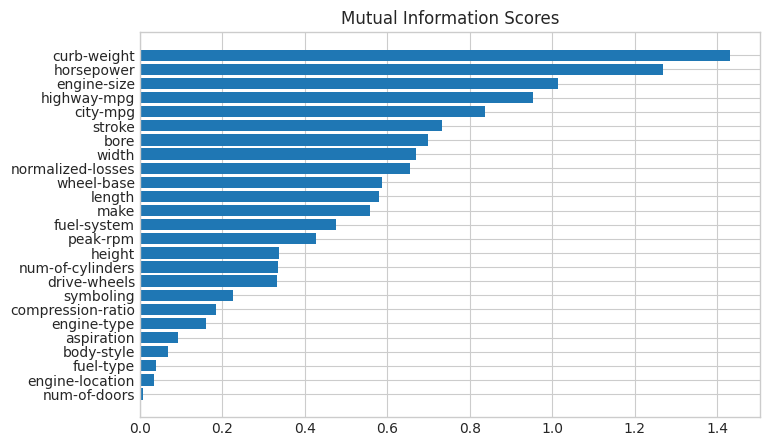

In [31]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(mi_scores)